What happens when you start with a matrix M, and you define M’_{ij} to be the Hadamard product (sum of the element products) of M by a matrix which is mostly 0 except for a 3x3 submatrix of all (⅓) centered around (i,j)? (this is simultaneously done for all i, j. Yikes!) Test your hypothesis by doing it to an image file of your face.

In [1]:
from PIL import Image
import math
import numpy as np
from matplotlib.pyplot import imshow
%matplotlib inline

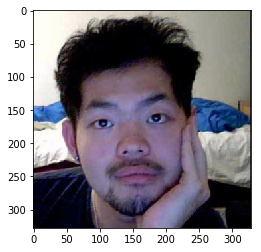

In [2]:
#original = Image.open('../image_tilt/aj_face.jpeg')
original = Image.open('yanxzhang.jpeg')
image_tensor = np.asarray(original)
imshow(image_tensor)

In [3]:
type(image_tensor), image_tensor.shape, image_tensor.dtype

(numpy.ndarray, (328, 328, 3), dtype('uint8'))

In [4]:
w = image_tensor.shape[0]
h = image_tensor.shape[1]
D = image_tensor.shape[2] # D is capital to indicate it as a constant. we won't be modifying D

Create a matrix to contain the transformed result that is the same shape as the original.

For each pixel in the image, apply the transformation individually on each rgb layer. Note that values are capped at 255.

In [5]:
def apply_transformation(size, factor):
    """
    Applies a transformation to each pixel by 
    size: size of the matrix, positive odd integer. if even, will effectively round up to an odd integer
    factor: a ratio to multiply by
    """
    margin = int(size/2)
    transformed = np.zeros(image_tensor.shape)
    transformed.shape, transformed.dtype
    for x in range(w):
        for y in range(h):
            # define the region to sample from
            x_min = x-margin if x-margin >= 0 else 0
            x_max = x+margin if x+margin < w else w-1
            y_min = y-margin if y-margin >= 0 else 0
            y_max = y+margin if y+margin < h else h-1
            # apply the transformation per rgb layer
            layers = []
            for z in range(D):
                value = np.rint(np.sum(image_tensor[np.ix_([x_min,x_max],[y_min,y_max],[z])] * factor))
                # cap the value at 255
                if value > 255:
                    value = 255
                layers.append(value)
            transformed[x][y] = np.asarray(layers)   
    return transformed

In [6]:
# def save_image(image, size, factor):
#     "Saves an image with the filename transform_sizexsize_1-factor"
#     filename = f'transform_{size}x{size}_1-{1/factor}.jpg'
#     savable = Image.fromarray(image, 'RGB')
#     image.save(savable)

Try the transformation with different parameters, matrix size and multiply factor.

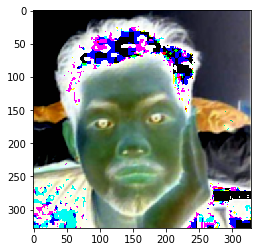

In [7]:
size = 3
factor = 1/3
one_third = apply_transformation(size,factor)
imshow(one_third)
#save_image(one_third)

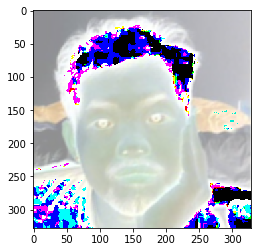

In [9]:
size = 3
factor = 1/9
threebythree_ninth = apply_transformation(size, factor)
imshow(threebythree_ninth)
#save_image(threebythree_ninth)

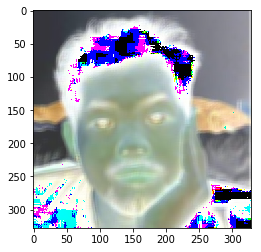

In [10]:
size = 5
factor = 1/5
five = apply_transformation(size, factor)
imshow(five)
#save_image(five, size, factor)

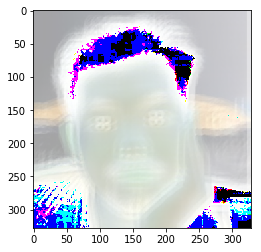

In [11]:
size = 11
factor = 1/11
eleven = apply_transformation(size, factor)
imshow(eleven)


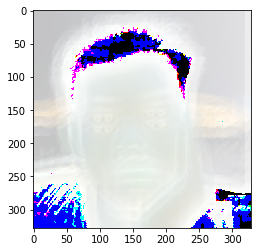

In [12]:
size = 17
factor = 1/17
seventeen = apply_transformation(size, factor)
imshow(seventeen)
#save_image(seventeen, size, factor)

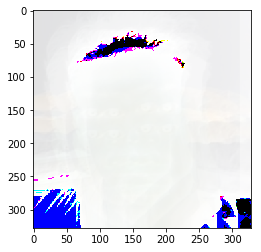

In [13]:
size = 33
factor = 1/33
imshow(apply_transformation(size, factor))

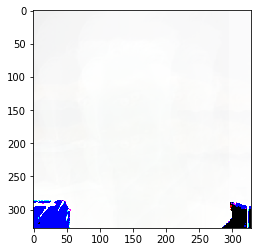

In [14]:
size = 65
factor = 1/65
imshow(apply_transformation(size, factor))